In [48]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from config import weather_api_key
from datetime import datetime

In [49]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a3c0ba9a2f12717bdf099c374394f0a


In [50]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
# We zip the latitudes and longitudes into tuples using the zip() function. Returns a ZIP object
lat_lngs = zip(lats, lngs)

In [51]:
# Add the latitudes and longitudes to a list.
# Here, we are casting the lat_lngs Zip object to a List, so that we can index it appropriately later
coordinates = list(lat_lngs)
print(coordinates)

138.59445374117496), (27.602156966314354, 18.354981059454133), (37.28648253166503, 152.45019427627778), (-10.95877940481067, 45.18670971965162), (-71.44211063708966, -100.71405855007539), (-21.951761137568113, -176.6522742553369), (-88.91567152164586, 63.908249617967385), (-33.0796188761866, -65.67650978700125), (-22.855923024315132, 160.54671307949576), (42.14923738565281, -116.7500632604866), (13.79991335067271, 37.5463554737608), (-63.338660661810735, -151.89112363363796), (-9.076972107724103, 122.79879596644531), (81.67215439243898, 136.22291473796423), (53.7090511738343, -51.24049178252832), (68.61951159097273, -144.50652092878784), (55.92161045151286, 80.23779831472905), (57.56134207161756, 161.1329395079103), (-89.7225467042018, 80.64598194377481), (-32.921489838527286, -45.22856329349506), (40.66577347277553, 66.70554535701154), (60.822764511532085, -67.32345231290505), (0.003495765569553555, 9.347737452985598), (73.58163000619521, 40.24119542097904), (31.149904467248447, -14.2

In [52]:
# Creating a random list of cities using citypy -----------------------------------------

# Open source, docs on Github: https://github.com/wingchen/citipy
# Citipy allows us to pass in coordinates and returns a city name, as a city object

from citipy import citipy

In [53]:
# Practice getting a city and country code by passing in randomly generated latitudes and longitudes

# Loop through 5/1500 values in the coordinates list
for coordinate in coordinates[:5]:
    # using the nearest_city function from the citipy module, we pass in the first and second coordinates (latitude, longitude) and print the city_name attribute
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
    # we do the same, but return country_code attribute
    citipy.nearest_city(coordinate[0],coordinate[1]).country_code)

bejar es
hobart au
mataura pf
upernavik gl
ruatoria nz


In [54]:
# We can use the above methodology to pass in our randomly generated coordinates and return city names, which we can use the OpenWeather API to access weather of 

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination. Loop through each coordinates in our coordinates list above
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list. From our list of randomly generated coordinates, we might have duplicated cities!
    # Important to account for edge cases
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

# Project plan! --------------------------

1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
2. Loop through the cities list.
3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
4.  Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
5. Build the city_url or endpoint for each city.
6. Log the URL and the record and set numbers.
7. Make an API request for each city.
    Parse the JSON weather data for the following:
        City, country, and date
        Latitude and longitude
        Maximum temperature
        Humidity
        Cloudiness
        Wind speed
8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [55]:
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1



Beginning Data Retrieval     
-----------------------------


In [56]:
# 2. Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

# This 

In [57]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6a3c0ba9a2f12717bdf099c374394f0a&q=melilla'

In [58]:
# Loop through all the cities in the list.
# Enumerate converts the iterable object passed to it into an Enumerate object, which is a tuple of structure: (<index>,<value>)
# In the case below, the first record would be (0, <first city>)
# Enumerate's second, optional argument takes a starting value. If we passed enumerate(cities,10), then the first record would be (10, <first city>) instead
# Combining this with tuple unpacking, we can get both the index AND the city separately, as needed
for i, city in enumerate(cities):

    # 3/4. Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    # 5. In cases where cities have spaces in their names, we want to remove the spaces with the replace() method and concatenate with "+" to avoid errors
    city_url = url + "&q=" + city.replace(" ","+")

    # 6. Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Try & Except blocks ------------------------------

# In case of errors, we don't want our code to immediately reach break out; instead we want to be able to return information to the user as to why certain information wasn't able to be found
# In the case of a bad URL in an API call, for example, we can use a try, except block to bypass that specific city and return the remaining cities
# Docs on Exception Handling: https://docs.python.org/3.6/tutorial/errors.html
# 7. Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

        # If an error is experienced, skip the city.
        # After except, we can even specify the type of error (ValueError, KeyError etc) to only cause exceptions to certain types of expected errors
    except:
        print("City not found. Skipping...")
        # Instead of writing pass, we can also use the keyword continue to indicate that the try code block above is run again (reset)
        # pass does nothing and continues reading the code below
        # Generally not good to Pass on errors, better practice to return some information or use another try block to handle the expected error
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

ng Record 14 of Set 16 | longyearbyen
Processing Record 15 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 16 of Set 16 | bredasdorp
Processing Record 17 of Set 16 | galesong
Processing Record 18 of Set 16 | newport
Processing Record 19 of Set 16 | quang ngai
Processing Record 20 of Set 16 | ilulissat
Processing Record 21 of Set 16 | port said
Processing Record 22 of Set 16 | sao felix do xingu
Processing Record 23 of Set 16 | mazamari
Processing Record 24 of Set 16 | mogadishu
Processing Record 25 of Set 16 | davila
Processing Record 26 of Set 16 | mackenzie
Processing Record 27 of Set 16 | kruisfontein
Processing Record 28 of Set 16 | vestmannaeyjar
Processing Record 29 of Set 16 | dunda
Processing Record 30 of Set 16 | tura
Processing Record 31 of Set 16 | zemio
Processing Record 32 of Set 16 | kavieng
Processing Record 33 of Set 16 | katsuura
Processing Record 34 of Set 16 | alice springs
Processing Record 35 of Set 16 | cochrane
Processing Record 36 of Set 16

In [60]:
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bejar,40.3864,-5.7634,46.00,10,100,2.77,ES,2021-02-04 12:20:54
1,Hobart,-42.8794,147.3294,68.00,64,0,8.05,AU,2021-02-04 12:15:22
2,Mataura,-46.1927,168.8643,44.78,82,7,3.74,NZ,2021-02-04 12:15:09
3,Upernavik,72.7868,-56.1549,-11.13,70,61,3.20,GL,2021-02-04 12:14:45
4,Jamui,24.9167,86.2167,71.33,33,0,6.40,IN,2021-02-04 12:20:54
5,Atuona,-9.8000,-139.0333,77.40,74,2,9.82,PF,2021-02-04 12:15:18
6,Salalah,17.0151,54.0924,77.00,57,0,8.05,OM,2021-02-04 12:13:14
7,Dikson,73.5069,80.5464,-10.12,92,100,12.44,RU,2021-02-04 12:13:29
8,Avarua,-21.2078,-159.7750,78.80,83,20,3.44,CK,2021-02-04 12:15:16
9,Vila Franca Do Campo,37.7167,-25.4333,53.60,62,20,21.85,PT,2021-02-04 12:15:37


In [64]:
# Reordering columns for readability
# We need to pass a list with the reordered columns into the index of the DataFrame, as below
city_data_df = city_data_df[['City', 'Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bejar,ES,2021-02-04 12:20:54,40.3864,-5.7634,46.00,10,100,2.77
1,Hobart,AU,2021-02-04 12:15:22,-42.8794,147.3294,68.00,64,0,8.05
2,Mataura,NZ,2021-02-04 12:15:09,-46.1927,168.8643,44.78,82,7,3.74
3,Upernavik,GL,2021-02-04 12:14:45,72.7868,-56.1549,-11.13,70,61,3.20
4,Jamui,IN,2021-02-04 12:20:54,24.9167,86.2167,71.33,33,0,6.40
...,...,...,...,...,...,...,...,...,...
546,San Vicente,AR,2021-02-04 12:15:08,-26.6167,-54.1333,64.85,100,97,5.23
547,Linhares,BR,2021-02-04 12:22:24,-19.3911,-40.0722,83.08,63,2,5.91
548,Mitsamiouli,KM,2021-02-04 12:22:24,-11.3847,43.2844,87.80,66,75,6.91
549,Buraydah,SA,2021-02-04 12:16:40,26.3260,43.9750,84.20,26,75,4.61


In [65]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
# to_csv method outputs our data to a csv file at the path specified above
# index_label appends the specified header "City_ID" to the column, instead of it being blank
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [66]:
# Plotting weather data to find insights
# Extract relevant fields from the DataFrame for plotting. Assign each column to its own Series
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

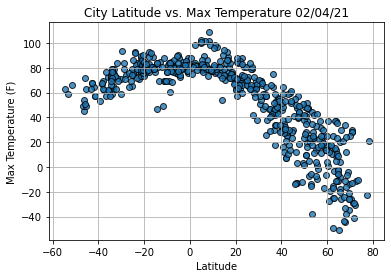

In [67]:
# To import the CURRENT time, we need to use the built-in time module from python
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
# "%x" in strftime() returns the date in mm-dd-yy format
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

Looking at the data above when compared to the date (04Feb2021), we can surmise that a large portion of our data is in the Southern Hemisphere, where it is currently summer (higher temperatures).

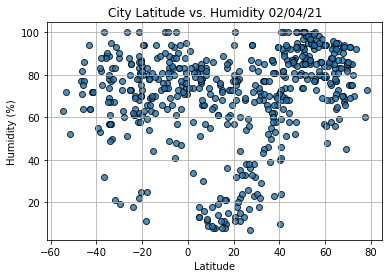

In [68]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

Looking at the Equator, or 0 Latitude, we can see some areas are very humid (Rainforest) while others very dry (Sahara, Middle East)

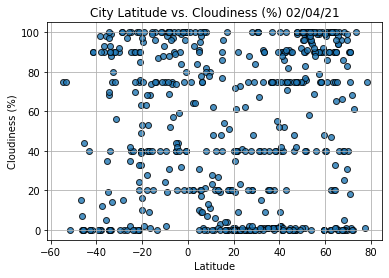

In [69]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

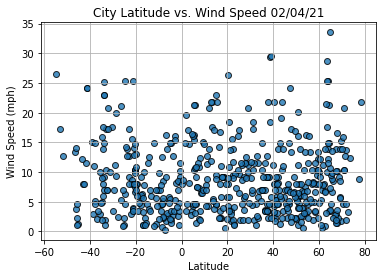

In [70]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()